This is a dataset with 10,000 rows discussing the hotness of songs and the attributes these songs have. Song hotness ranges from 0 to 1. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline
import statsmodels.api as sm
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\music.csv')
pd.options.display.max_columns = None
df.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [3]:
df = df.drop(['artist_mbtags'], axis=1)

In [4]:
# this will take care of all the int or float columns
df = df.fillna(df.mean()) 

# This takes care of the Nan in 'artist_mbtags'
df['similar'] = df['similar'].fillna(df['similar'].mode()[0])
df['terms'] = df['terms'].fillna(df['terms'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])

df['song_hotttnesss'] = np.where(df['song.hotttnesss'] >= 0.5, 1, 0)

In [5]:
print (df.isna().sum(), df.dtypes)

artist.hotttnesss            0
artist.id                    0
artist.name                  0
artist_mbtags_count          0
bars_confidence              0
bars_start                   0
beats_confidence             0
beats_start                  0
duration                     0
end_of_fade_in               0
familiarity                  0
key                          0
key_confidence               0
latitude                     0
location                     0
longitude                    0
loudness                     0
mode                         0
mode_confidence              0
release.id                   0
release.name                 0
similar                      0
song.hotttnesss              0
song.id                      0
start_of_fade_out            0
tatums_confidence            0
tatums_start                 0
tempo                        0
terms                        0
terms_freq                   0
time_signature               0
time_signature_confidence    0
title   

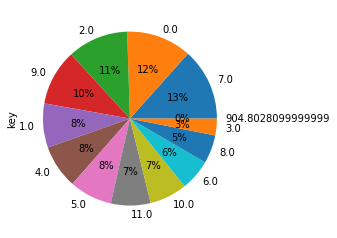

In [6]:
#Finding the frequency each musical key is used
df.key.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [7]:
numeric = df.select_dtypes(exclude = ['object'])
obj = df.select_dtypes(include = ['object'])

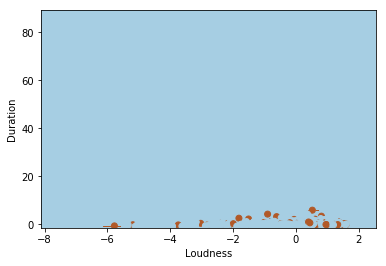

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(df.loudness),
    'duration': stats.zscore(df.duration)
})

# Fit our model.
Y = df['song_hotttnesss']
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [9]:
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
import pydotplus
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from sklearn.model_selection import cross_val_score
import timeit

In [11]:
music = df[['song_hotttnesss','beats_confidence', 'duration', 'key', 'loudness', 'tempo']]
music.head()

,song_hotttnesss,beats_confidence,duration,key,loudness,tempo
0,1,0.834,218.93179,1.0,-11.197,92.198
1,0,1.000,148.03546,6.0,-9.843,121.274
2,0,0.980,177.47546,8.0,-9.689,100.070
3,0,0.809,233.40363,0.0,-9.013,119.293
4,1,0.883,209.60608,2.0,-4.501,129.738


In [12]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    X = music.drop('song_hotttnesss', 1)
    Y = music['song_hotttnesss']
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 82.87%.

Depth: 2
Model Performance: 82.87%.

Depth: 3
Model Performance: 82.87%.

Depth: 4
Model Performance: 82.79%.

Depth: 5
Model Performance: 82.61%.

Depth: 6
Model Performance: 82.23%.

Depth: 7
Model Performance: 81.87%.

Depth: 8
Model Performance: 81.55%.

Depth: 9
Model Performance: 80.92%.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.96399 to fit

Depth: 10
Model Performance: 80.20%.

--- Runtime: 41.6212984 seconds. ---


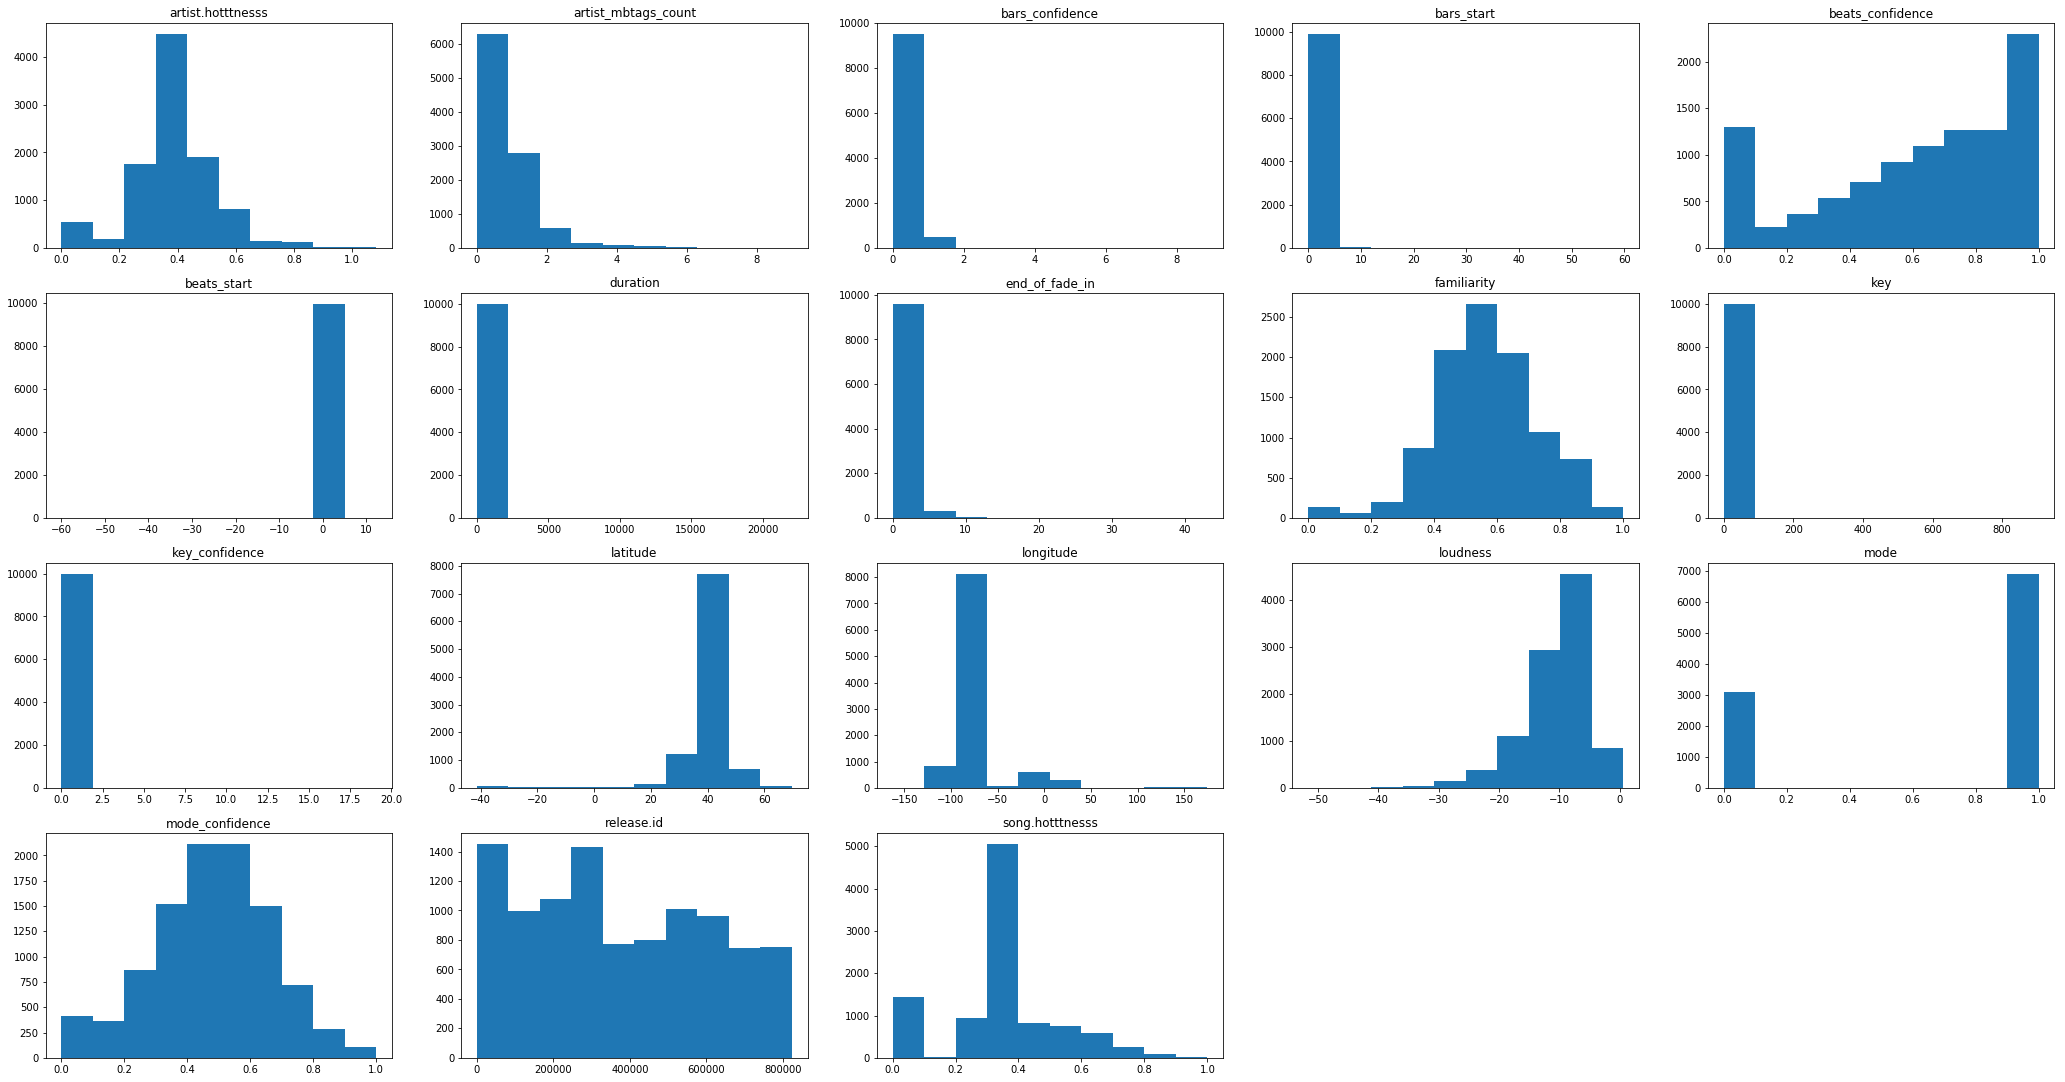

In [13]:
import itertools 
import matplotlib.gridspec as gridspec

label = numeric.columns.tolist() # 18 
clf_list = list(range(0, 18) ) 

fig = plt.figure(figsize=(36, 24)) 
gs = gridspec.GridSpec(5, 5) 
grid = itertools.product([0,1, 2, 3, 4 ],repeat=2)

print (grid)

for clf, label, grd in zip(clf_list, label, grid):

 #plt.subplot(3, 3, 3)
 ax = plt.subplot(gs[grd[0], grd[1]])
 plt.hist(numeric[label])
 plt.title(label)

plt.show()


In [14]:
from sklearn import preprocessing
obj0 = obj.apply(preprocessing.LabelEncoder().fit_transform)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

obj1 = scaler.fit_transform(obj0)
obj2 = pd.DataFrame(obj1)


print(obj2.head())

          0         1         2         3         4         5         6  \
0 -0.568257 -1.200206 -1.818560 -0.766981  1.205503  0.121417  0.006727   
1  0.397776  1.249813 -0.058316 -0.960125  0.983171 -1.380964 -1.404991   
2  0.232170  1.064861  0.451228 -0.166727 -0.331387  1.464795  1.209015   
3 -1.061513 -1.677932 -0.340460 -0.704076 -1.353145  0.161600  0.867720   
4  1.515170 -0.502899  0.451228  0.188552  1.111954 -0.892179  0.852207   

          7  
0 -0.463082  
1  0.946452  
2 -1.566491  
3  0.928234  
4 -0.834219  


In [15]:
df = pd.concat([numeric, obj2], axis = 1)
df.head()

,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,longitude,loudness,mode,mode_confidence,release.id,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,time_signature,time_signature_confidence,year,song_hotttnesss,0,1,2,3,4,5,6,7
0,0.401998,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,-63.933358,-11.197,0,0.636,300848,0.602120,218.932,0.779,0.28519,92.198,1.000000,4.0,0.778,0,1,-0.568257,-1.200206,-1.818560,-0.766981,1.205503,0.121417,0.006727,-0.463082
1,0.417500,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,-90.048920,-9.843,0,0.430,300822,0.342761,137.915,0.969,0.20627,121.274,1.000000,4.0,0.384,1969,0,0.397776,1.249813,-0.058316,-0.960125,0.983171,-1.380964,-1.404991,0.946452
2,0.343428,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,-63.933358,-9.689,1,0.565,514953,0.342761,172.304,0.482,0.42132,100.070,1.000000,1.0,0.000,0,0,0.232170,1.064861,0.451228,-0.166727,-0.331387,1.464795,1.209015,-1.566491
3,0.454231,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,-63.933358,-9.013,1,0.749,287650,0.342761,217.124,0.601,0.56254,119.293,0.988584,4.0,0.000,1982,0,-1.061513,-1.677932,-0.340460,-0.704076,-1.353145,0.161600,0.867720,0.928234
4,0.401724,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,-63.933358,-4.501,1,0.371,611336,0.604501,198.699,1.000,0.13576,129.738,0.887288,4.0,0.562,2007,1,1.515170,-0.502899,0.451228,0.188552,1.111954,-0.892179,0.852207,-0.834219


In [16]:
y = df['song_hotttnesss']
#X = df.loc[:, df.columns.isin(['artist.hotttnesss','tempo', 'loudness', 'key', 'duration','time_signature','year'])]
X = df.loc[:, df.columns != 'song_hotttnesss']
X = X.drop('song.hotttnesss', axis=1)


# Make the categorical variable 'country' into dummies.
#X = pd.concat([X, pd.get_dummies(df['location'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

print(X_train.head())

   artist.hotttnesss  artist_mbtags_count  bars_confidence  bars_start  \
0           0.401998                  0.0            0.643     0.58521   
1           0.417500                  1.0            0.007     0.71054   
2           0.343428                  0.0            0.980     0.73152   
3           0.454231                  1.0            0.017     1.30621   
4           0.401724                  0.0            0.175     1.06368   

   beats_confidence  beats_start   duration  end_of_fade_in  familiarity  key  \
0             0.834      0.58521  218.93179           0.247     0.581794  1.0   
1             1.000      0.20627  148.03546           0.148     0.630630  6.0   
2             0.980      0.73152  177.47546           0.282     0.487357  8.0   
3             0.809      0.81002  233.40363           0.000     0.630382  0.0   
4             0.883      0.13576  209.60608           0.066     0.651046  2.0   

   key_confidence   latitude  longitude  loudness  mode  mode_confid

In [17]:
#Pipeline Construction.
anova = SelectKBest(f_classif, k=3)
svm = SVC(kernel='rbf')
anova_svm = make_pipeline(anova, svm)

#Fitting & Cross-Validation.
anova_svm.fit(X_train,y_train)
scores = cross_val_score(anova_svm, X_test, y_test, cv=2)

#De-Masking Selected Features.
features = anova.get_support(indices=True)
feature_names = list(X_test.columns)
selected_features = []
for feature in features:
    selected_features.append(feature_names[feature])

#Printing Outcomes.
print('Cross-Validation Scores: {}\n'.format(scores))
print('Cross-Validation Score Averaged Across Folds: {:.2%}.\n'.format(scores.mean()))
print('Selected Features: {}\n'.format(selected_features))

Cross-Validation Scores: [0.83316683 0.83483483]

Cross-Validation Score Averaged Across Folds: 83.40%.

Selected Features: ['artist.hotttnesss', 'familiarity', 'year']



In [18]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.clf = ensemble.GradientBoostingClassifier(**params)
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)


# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
print(table_train)


col_0               0    1   All
song_hotttnesss                 
0                6484  136  6620
1                 700  680  1380
All              7184  816  8000


In [19]:
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.017
Percent Type II errors: 0.0875

Test set accuracy:
Percent Type I errors: 0.0435
Percent Type II errors: 0.1145


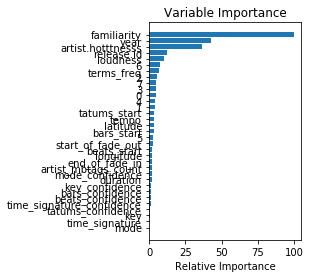

In [20]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

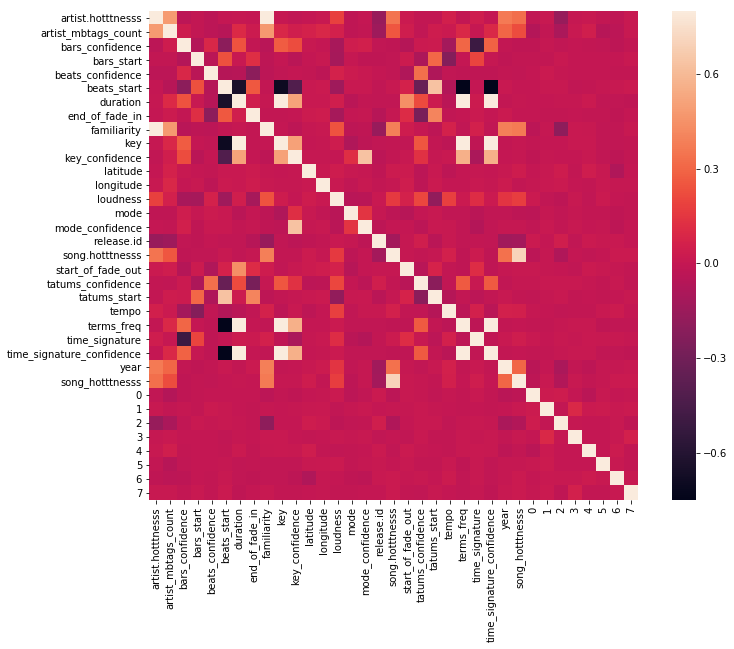

In [21]:
# Make the correlation matrix.
cor = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(cor, vmax=.8, square=True)
plt.show()


In [22]:
# Statsmodel logistic regression

# Declare predictors.
y_statsmod = df['song.hotttnesss']
x_statsmod = df.iloc[:,:-1]

# The Statsmodels formulation requires a column with constant value 1 that will act as the intercept.
x_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(y_statsmod, x_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.498418
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:        song.hotttnesss   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9965
Method:                           MLE   Df Model:                           34
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                 -0.1878
Time:                        22:52:51   Log-Likelihood:                -4984.2
converged:                       True   LL-Null:                       -4196.1
                                        LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
artist.hotttnesss            -0.0296      0.281     -0.106      0.916      -0

In [23]:
#The Statsmodels formulation requires a column with constant value 1 that will act as the intercept.

X_train['intercept'] = 1
#Declare and fit the model.

logit = sm.Logit(y_train, X_train) 
result = logit.fit() 
#predictions = result.predict( y_test) # vs x_test
print(result.summary())

ypred = result.predict(X_train) 
print(ypred)



print(X_train.head())

Optimization terminated successfully.
         Current function value: 0.357650
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:        song_hotttnesss   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7966
Method:                           MLE   Df Model:                           33
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.2222
Time:                        22:52:51   Log-Likelihood:                -2861.2
converged:                       True   LL-Null:                       -3678.6
                                        LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
artist.hotttnesss             1.1166      0.465      2.402      0.016       0